In [222]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [223]:
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

In [224]:
# Load the data
df = pd.read_csv('Online Shopping Data.csv')

# DATA PREPROCESSING

In [225]:
df.shape

(201, 17)

In [226]:
df.columns

Index(['Gender', 'Online_Shopping_Freq', 'Online_Purchase_Proportion',
       'Review_Check_Freq', 'Attraction_Factor', 'Retailer_Choice_Factors',
       'Preferred_Payment', 'Local_vs_Intl_Retailers', 'Preferred_Marketplace',
       'Security_Concern_Level', 'Promo_Participation', 'Price_Sensitivity',
       'Comfortable_Price_Range', 'Frequent_Products', 'Major_Drawback',
       'Authenticity_Concern', 'Desired_Improvements'],
      dtype='object')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      201 non-null    object
 1   Online_Shopping_Freq        201 non-null    object
 2   Online_Purchase_Proportion  201 non-null    object
 3   Review_Check_Freq           201 non-null    object
 4   Attraction_Factor           201 non-null    object
 5   Retailer_Choice_Factors     201 non-null    object
 6   Preferred_Payment           201 non-null    object
 7   Local_vs_Intl_Retailers     201 non-null    object
 8   Preferred_Marketplace       201 non-null    object
 9   Security_Concern_Level      201 non-null    object
 10  Promo_Participation         201 non-null    object
 11  Price_Sensitivity           201 non-null    object
 12  Comfortable_Price_Range     201 non-null    object
 13  Frequent_Products           201 non-null    object

In [228]:
df.describe()

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,4,5,5,4,5,4,4,3,4,4,4,4,4,13,6,4,24
top,Female,Once in a month,0-20 %,Always,Ease and Comfort of shopping from home,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Mostly confident, with occasional concerns",Better product descriptions and images
freq,125,99,92,123,98,85,167,150,99,104,67,114,124,114,101,82,92


In [229]:
df.isnull().sum()

Gender                        0
Online_Shopping_Freq          0
Online_Purchase_Proportion    0
Review_Check_Freq             0
Attraction_Factor             0
Retailer_Choice_Factors       0
Preferred_Payment             0
Local_vs_Intl_Retailers       0
Preferred_Marketplace         0
Security_Concern_Level        0
Promo_Participation           0
Price_Sensitivity             0
Comfortable_Price_Range       0
Frequent_Products             0
Major_Drawback                0
Authenticity_Concern          0
Desired_Improvements          0
dtype: int64

In [230]:
df.head(10)

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
0,Male,Rarely or Never,0-20 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Credit or debit card,"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality",Neutral or unsure,Enhanced customer reviews and ratings system
1,Female,Rarely or Never,0-20 %,Always,Attractive discounts and promotions,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Others,Neutral,Rarely or Never participate,Slightly price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Enhanced customer reviews and ratings system
2,Female,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Daraz,Somewhat concerned,Frequently participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Yes, always confident in product authenticity ...","Better product descriptions and images, Enhanc..."
3,Male,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Product reviews and ratings,Cash on delivery (if available),Prefer local retailers,AliExpress,Somewhat concerned,Rarely or Never participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Better product descriptions and images
4,Female,Rarely or Never,0-20 %,Frequently,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Amazon,Very concerned,Rarely or Never participate,Moderately price-sensitive,less than 1k,"Books and media (e.g., movies, music)","Yes, issues with product quality","No, often concerned about product authenticity...","Better product descriptions and images, Improv..."
5,Male,Once in a month,41-60 %,Frequently,Wide variety of products,Price and discounts,Credit or debit card,Prefer local retailers,Daraz,Very concerned,Always take advantage of promotions and discounts,Extremely price-sensitive,more than 10k,Electronics and gadgets,"Yes, issues with product quality","Yes, always confident in product authenticity ...",Better product descriptions and images
6,Female,Once in a month,61-80%,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality",Neutral or unsure,Enhanced customer reviews and ratings system
7,Male,Rarely or Never,41-60 %,Always,Ease and Comfort of shopping from home,Customer service and support,Credit or debit card,"No preference, depends on the product",Daraz,Very concerned,Frequently participate,Extremely price-sensitive,5k to 10k,"Clothing, Electronics, E-games","Yes, difficulty with returns or refunds","Mostly confident, with occasional concerns","Better product descriptions and images, Improv..."
8,Female,Once in a week,61-80%,Occasionally,Time-saving,Brand reputation and trustworthiness,Credit or debit card,"No preference, depends on the product",Others,Very concerned,Occasionally participate,Slightly price-sensitive,5k to 10k,Clothing and fashion accessories,"Yes, delayed or problematic deliveries","Mostly confident, with occasional concerns","Better product descripti

In [231]:
df.Online_Purchase_Proportion.fillna(df.Online_Purchase_Proportion.mode()[0], inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_6332\4100523070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Online_Purchase_Proportion.fillna(df.Online_Purchase_Proportion.mode()[0], inplace=True)


In [232]:
df.isnull().sum()

Gender                        0
Online_Shopping_Freq          0
Online_Purchase_Proportion    0
Review_Check_Freq             0
Attraction_Factor             0
Retailer_Choice_Factors       0
Preferred_Payment             0
Local_vs_Intl_Retailers       0
Preferred_Marketplace         0
Security_Concern_Level        0
Promo_Participation           0
Price_Sensitivity             0
Comfortable_Price_Range       0
Frequent_Products             0
Major_Drawback                0
Authenticity_Concern          0
Desired_Improvements          0
dtype: int64

Encoding Categorical Data

In [233]:
categorical_cols = df.select_dtypes(include=['object']).columns
data_encoded = df.copy()

label_encoder = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(df[col])

In [234]:
data_encoded.head(10)

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
0,2,4,0,0,1,0,2,0,2,3,2,1,0,2,5,1,10
1,1,4,0,0,0,3,1,0,3,0,3,3,0,2,1,1,10
2,1,2,2,0,1,0,1,0,2,2,1,1,0,2,5,3,3
3,2,2,2,0,1,3,1,2,0,2,3,1,0,2,1,1,0
4,1,4,0,1,1,0,1,0,1,3,3,1,2,1,5,2,6
5,2,2,2,1,4,2,2,2,2,3,0,0,3,4,5,3,0
6,1,2,3,0,1,0,1,0,2,3,2,1,0,2,5,1,10
7,2,4,2,0,1,1,2,0,2,3,1,0,1,3,4,0,6
8,1,3,3,2,2,0,2,0,3,3,2,3,1,2,3,0,5
9,2,2,2,0,1,0,2,0,3,2,1,1,1,2,1,0,16


Feature Scaling

In [235]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=data_encoded.columns)
scaled_df.to_csv('Online Shopping Data_Scaled.csv', index=False)

In [236]:
scaled_df.describe()

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.457711,0.685323,0.267413,0.225539,0.391791,0.608624,0.389718,0.206468,0.708126,0.701493,0.610282,0.391376,0.202322,0.198590,0.726368,0.351575,0.250054
std,0.168350,0.256507,0.296345,0.328278,0.336964,0.411573,0.160293,0.375377,0.276778,0.380647,0.343389,0.318770,0.296226,0.149942,0.330078,0.371482,0.290127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.500000,0.000000,0.000000,0.250000,0.000000,0.333333,0.000000,0.666667,0.666667,0.333333,0.333333,0.000000,0.166667,0.600000,0.000000,0.000000
50%,0.333333,0.500000,0.250000,0.000000,0.250000,0.666667,0.333333,0.000000,0.666667,1.000000,0.666667,0.333333,0.000000,0.166667,1.000000,0.333333,0.086957
75%,0.666667,1.000000,0.500000,0.333333,0.500000,1.000000,0.333333,0.500000,1.000000,1.000000,1.000000,0.333333,0.333333,0.166667,1.000000,0.666667,0.434783
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [237]:
scaled_df.head(10)

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
0,0.666667,1.00,0.00,0.000000,0.25,0.000000,0.666667,0.0,0.666667,1.000000,0.666667,0.333333,0.000000,0.166667,1.0,0.333333,0.434783
1,0.333333,1.00,0.00,0.000000,0.00,1.000000,0.333333,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.166667,0.2,0.333333,0.434783
2,0.333333,0.50,0.50,0.000000,0.25,0.000000,0.333333,0.0,0.666667,0.666667,0.333333,0.333333,0.000000,0.166667,1.0,1.000000,0.130435
3,0.666667,0.50,0.50,0.000000,0.25,1.000000,0.333333,1.0,0.000000,0.666667,1.000000,0.333333,0.000000,0.166667,0.2,0.333333,0.000000
4,0.333333,1.00,0.00,0.333333,0.25,0.000000,0.333333,0.0,0.333333,1.000000,1.000000,0.333333,0.666667,0.083333,1.0,0.666667,0.260870
5,0.666667,0.50,0.50,0.333333,1.00,0.666667,0.666667,1.0,0.666667,1.000000,0.000000,0.000000,1.000000,0.333333,1.0,1.000000,0.000000
6,0.333333,0.50,0.75,0.000000,0.25,0.000000,0.333333,0.0,0.666667,1.000000,0.666667,0.333333,0.000000,0.166667,1.0,0.333333,0.434783
7,0.666667,1.00,0.50,0.000000,0.25,0.333333,0.666667,0.0,0.666667,1.000000,0.333333,0.000000,0.333333,0.250000,0.8,0.000000,0.260870
8,0.333333,0.75,0.75,0.666667,0.50,0.000000,0.666667,0.0,1.000000,1.000000,0.666667,1.000000,0.333333,0.166667,0.6,0.000000,0.217391
9,0.666667,0.50,0.50,0.000000,0.25,0.000000,0.666667,0.0,1.000000,0.666667,0.333333,0.333333,0.333333,0.166667,0.2,0.000000,0.695652


In [238]:
df.columns

Index(['Gender', 'Online_Shopping_Freq', 'Online_Purchase_Proportion',
       'Review_Check_Freq', 'Attraction_Factor', 'Retailer_Choice_Factors',
       'Preferred_Payment', 'Local_vs_Intl_Retailers', 'Preferred_Marketplace',
       'Security_Concern_Level', 'Promo_Participation', 'Price_Sensitivity',
       'Comfortable_Price_Range', 'Frequent_Products', 'Major_Drawback',
       'Authenticity_Concern', 'Desired_Improvements'],
      dtype='object')

In [239]:
df.Gender.value_counts()

Gender
Female             125
Male                74
12/3/2023 21:50      1
Other                1
Name: count, dtype: int64

In [240]:
df['Gender'] = df['Gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')
df.Gender.value_counts()

Gender
Female    125
Male       74
Other       2
Name: count, dtype: int64

# Exploratory Data Analysis

In [241]:
df.columns

Index(['Gender', 'Online_Shopping_Freq', 'Online_Purchase_Proportion',
       'Review_Check_Freq', 'Attraction_Factor', 'Retailer_Choice_Factors',
       'Preferred_Payment', 'Local_vs_Intl_Retailers', 'Preferred_Marketplace',
       'Security_Concern_Level', 'Promo_Participation', 'Price_Sensitivity',
       'Comfortable_Price_Range', 'Frequent_Products', 'Major_Drawback',
       'Authenticity_Concern', 'Desired_Improvements'],
      dtype='object')

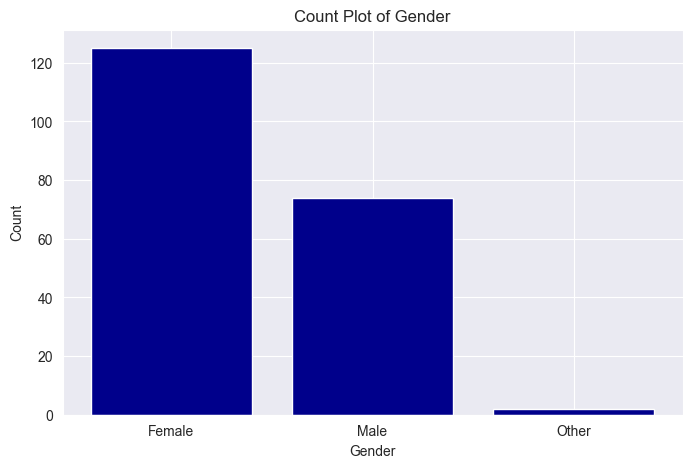

In [242]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color='darkblue')
plt.xlabel('Gender');plt.ylabel('Count')
plt.title('Count Plot of Gender')
plt.show()

In [243]:
df['Online_Shopping_Freq'] = df['Online_Shopping_Freq'].apply(lambda x: x if x in ['Once in a month','Once in a week','Multiple times per week'] else 'Rarely or Never')

In [244]:
df.Online_Shopping_Freq.value_counts()

Online_Shopping_Freq
Once in a month            99
Rarely or Never            73
Once in a week             18
Multiple times per week    11
Name: count, dtype: int64

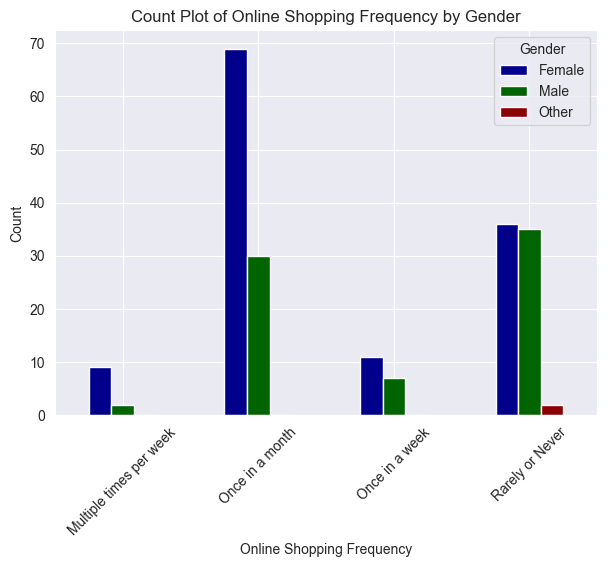

In [245]:
online_shopping_freq_counts = df.groupby(['Online_Shopping_Freq', 'Gender']).size().unstack()
fig, ax = plt.subplots(figsize=(7, 5))
online_shopping_freq_counts.plot(kind='bar', ax=ax, color=['darkblue', 'darkgreen', 'darkred'])
ax.set_xlabel('Online Shopping Frequency')
ax.set_ylabel('Count')
ax.set_title('Count Plot of Online Shopping Frequency by Gender')
plt.xticks(rotation=45)
plt.show()

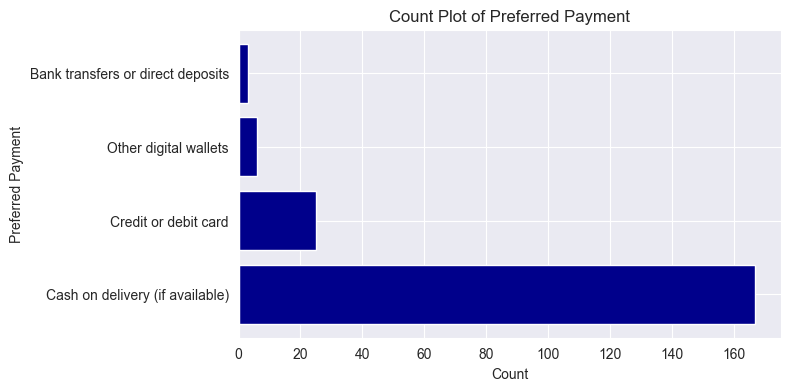

In [246]:
preferred_payment_counts = df['Preferred_Payment'].value_counts()
plt.figure(figsize=(7, 4))
plt.barh(preferred_payment_counts.index, preferred_payment_counts.values, color='darkblue')
plt.xlabel('Count')
plt.ylabel('Preferred Payment')
plt.title('Count Plot of Preferred Payment')
plt.show()

In [247]:
df.columns

Index(['Gender', 'Online_Shopping_Freq', 'Online_Purchase_Proportion',
       'Review_Check_Freq', 'Attraction_Factor', 'Retailer_Choice_Factors',
       'Preferred_Payment', 'Local_vs_Intl_Retailers', 'Preferred_Marketplace',
       'Security_Concern_Level', 'Promo_Participation', 'Price_Sensitivity',
       'Comfortable_Price_Range', 'Frequent_Products', 'Major_Drawback',
       'Authenticity_Concern', 'Desired_Improvements'],
      dtype='object')

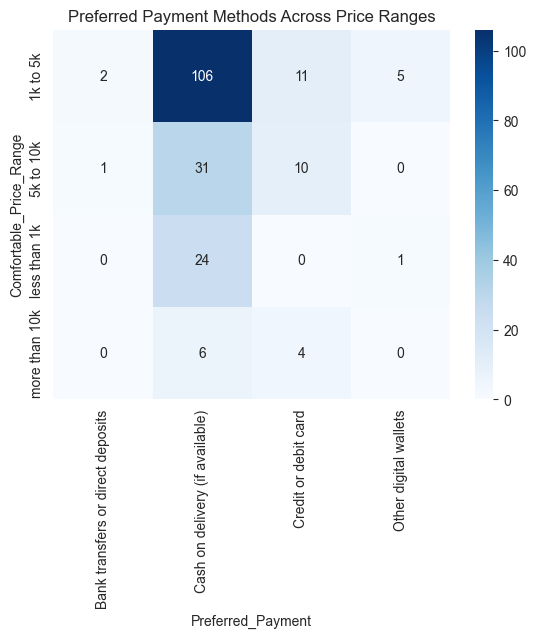

In [248]:
sns.heatmap(pd.crosstab(df["Comfortable_Price_Range"], df["Preferred_Payment"]), annot=True, cmap="Blues", fmt="d")
plt.title("Preferred Payment Methods Across Price Ranges")
plt.show()

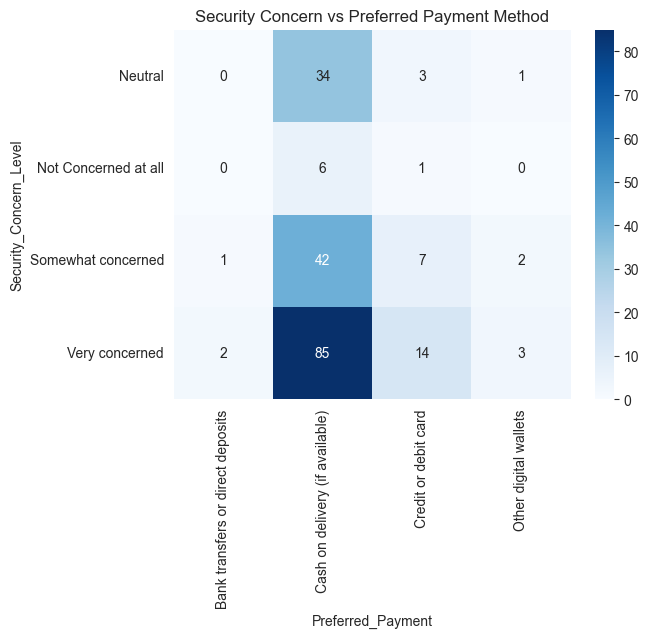

In [249]:
sns.heatmap(pd.crosstab(df["Security_Concern_Level"], df["Preferred_Payment"]), annot=True, cmap="Blues", fmt="d")
plt.title("Security Concern vs Preferred Payment Method")
plt.show()

# K-Means Clustering

Determine the number of clusters using the Elbow Method

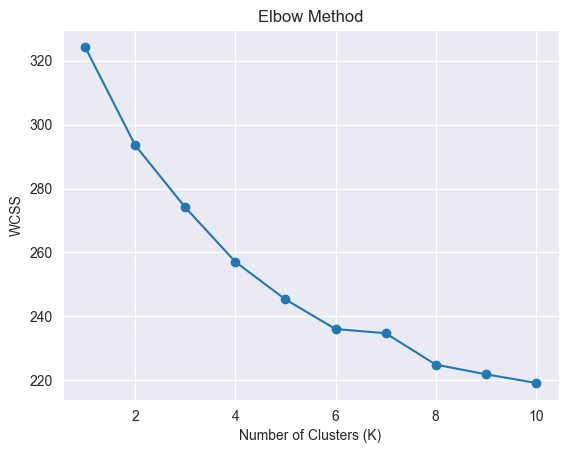

In [259]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

Training the k-mean clustering Model

In [260]:
kmeans = KMeans(n_clusters=8, random_state=42) 
df['Cluster'] = kmeans.fit_predict(scaled_df)
print(df[['Gender', 'Online_Shopping_Freq', 'Price_Sensitivity', 'Cluster']].head())

   Gender Online_Shopping_Freq           Price_Sensitivity  Cluster
0    Male      Rarely or Never  Moderately price-sensitive        7
1  Female      Rarely or Never    Slightly price-sensitive        6
2  Female      Once in a month  Moderately price-sensitive        7
3    Male      Once in a month  Moderately price-sensitive        3
4  Female      Rarely or Never  Moderately price-sensitive        2


In [263]:
Y = kmeans.fit_predict(scaled_df)
print(Y)

[7 6 7 3 2 3 7 7 0 7 6 0 2 0 2 5 0 1 7 6 4 1 3 4 4 0 7 7 1 6 7 2 2 6 6 7 7
 7 1 1 1 2 4 7 0 0 5 5 3 3 0 7 1 7 5 4 7 5 3 7 3 5 4 6 1 1 5 7 1 0 2 2 2 7
 6 0 6 5 7 1 5 0 7 3 5 0 5 0 5 3 6 6 0 7 3 5 3 6 5 5 1 3 1 1 0 4 1 5 3 1 4
 3 2 5 2 5 5 7 0 6 4 4 1 0 7 7 2 1 6 5 5 3 6 4 2 6 7 0 4 3 2 2 0 4 6 6 5 6
 5 3 3 7 5 4 0 7 1 2 7 4 1 7 1 1 5 4 3 6 3 4 4 6 1 1 4 1 3 3 3 1 4 0 3 1 2
 5 2 1 3 2 3 1 0 1 7 3 5 1 7 4 0]


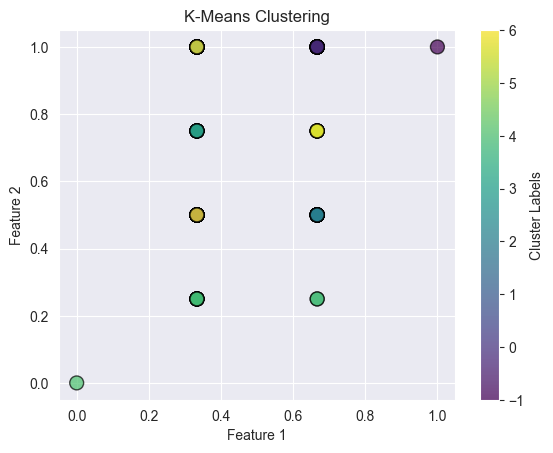

In [265]:
plt.scatter(
    scaled_df.iloc[:, 0], scaled_df.iloc[:, 1],
    c=df['Cluster'] - 1, cmap='viridis',
    s=100, alpha=0.7, edgecolor='k'
)
plt.colorbar(label='Cluster Labels')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
